<a href="https://colab.research.google.com/github/negrete-93/M-todo-de-Jacobi/blob/main/Metodo_de_Jacobi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método de Jacobi
El método de Jacobi consiste en despejar cada incógnita de su respectiva ecuación y luego con un valor inicial, ir calculando aproximaciones sucesivas de la solución.
Se usa cuando la matriz es grande y dispersa, también es útil en aplicaciones de análisis numérico, simulación de procesos físicos y métodos de diferencias finitas en ecuaciones diferenciales.

Solución aproximada: [1.36111055 2.19444389 2.47222167 3.305555  ]
Iteraciones: 22
Error máximo: 9.944154e-01


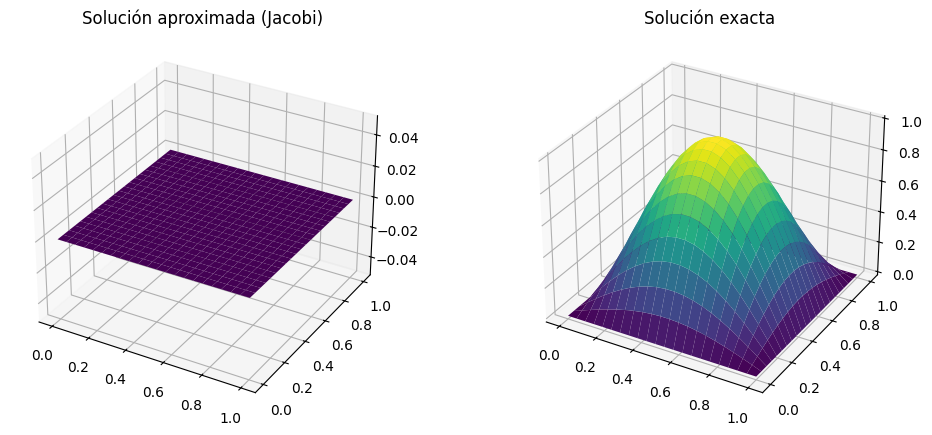

In [5]:
import numpy as np
#Definimos el metodo de Jocobi
def jacobi(A, b, x0, tol=1e-6, max_iter=100):
    n = len(b)
    x = x0.copy()
    for k in range(max_iter):
        x_new = np.zeros_like(x)
        for i in range(n):
            s = sum(A[i][j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - s) / A[i][i]
        # criterio de parada
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, k+1
        x = x_new
    return x, max_iter

# Definir A y b
A = np.array([
    [1, -1/4, -1/4, 0],
    [-1/4, 1, 0, -1/4],
    [-1/4, 0, 1, -1/4],
    [0, -1/4, -1/4, 1]
], dtype=float)

b = np.array([7/36, 37/36, 47/36, 77/36], dtype=float)

# Definimos la aproximación inicial
x0 = np.zeros(len(b))

# Ejecutar Jacobi
sol, iters = jacobi(A, b, x0)
print("Solución aproximada:", sol)
print("Iteraciones:", iters)

#Malla
x = np.linspace(0, 1, n+2)
y = np.linspace(0, 1, n+2)
X, Y = np.meshgrid(x, y)

# CI
u = np.zeros((n+2, n+2))
fxy = f(X, Y)


# Solución exacta
u_exact = np.sin(np.pi*X) * np.sin(np.pi*Y)

# Error
error = np.max(np.abs(u - u_exact))
print(f"Error máximo: {error:.6e}")

# Gráfica
fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, u, cmap='viridis')
ax1.set_title("Solución aproximada (Jacobi)")

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, u_exact, cmap='viridis')
ax2.set_title("Solución exacta")

plt.show()
